In [31]:
# API which was taken from the website CoinMarketCap

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15', # the limitation corresponding to the rows
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '496c8a65-36d9-4784-8361-86d603e64dc2',  # copy paste key from the api website
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-05-09T14:06:27.891Z', 'error_code': 0, 'error_message': None, 'elapsed': 21, 'credit_count': 1, 'notice': None, 'total_count': 9905}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11041, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [6]:
type(data)

dict

In [52]:
# Import library pandas
import pandas as pd


#This allows us to see all the columns of the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [33]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data']) # it will convert the nested JSON into a flat DataFrame
df['timestamp'] = pd.to_datetime('now') # add column at the end for the currently time
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11041,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969594e+07,1.969594e+07,False,NaN,1,NaN,NaN,None,2024-05-09T14:05:00.000Z,61272.989386,2.449348e+10,-2.8341,-0.221673,-1.726231,4.552985,-12.619090,-11.809566,29.010677,1.206829e+12,53.3032,1.286733e+12,None,2024-05-09T14:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 17:06:34.834079
1,1027,Ethereum,ETH,ethereum,8905,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201052e+08,1.201052e+08,True,NaN,2,NaN,NaN,None,2024-05-09T14:04:00.000Z,2977.828490,1.089854e+10,-5.4973,-0.198997,-1.441492,0.348290,-17.278994,-23.805362,18.525244,3.576528e+11,15.7934,3.576528e+11,None,2024-05-09T14:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 17:06:34.834079
2,825,Tether USDt,USDT,tether,84999,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.109560e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-09T14:04:00.000Z,0.999564,4.483529e+10,-0.5492,-0.003622,-0.015981,-0.015931,-0.047413,-0.242803,-0.039547,1.109076e+11,4.8975,1.130373e+11,None,2024-05-09T14:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-09 17:06:34.834079
3,1839,BNB,BNB,bnb,2155,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475871e+08,1.475871e+08,False,NaN,4,NaN,NaN,None,2024-05-09T14:04:00.000Z,594.292089,1.831473e+09,17.8588,0.018857,1.721428,6.606816,2.431361,12.458672,83.057775,8.770984e+10,3.8753,8.770984e+10,None,2024-05-09T14:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 17:06:34.834079
4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.481407e+08,5.755415e+08,True,NaN,5,NaN,NaN,None,2024-05-09T14:04:00.000Z,143.280654,2.256443e+09,-5.1409,-0.510199,-2.845100,5.427792,-17.452243,-1.023943,35.285876,6.420990e+10,2.8346,8.246396e+10,None,2024-05-09T14:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 17:06:34.834079
5,3408,USDC,USDC,usd-coin,18999,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.309829e+10,3.309829e+10,False,NaN,6,NaN,NaN,None,2024-05-09T14:04:00.000Z,0.999957,5.008216e+09,-8.3929,0.000530,-0.003485,0.006334,-0.007474,0.003459,-0.001324,3.309685e+10,1.4623,3.309685e+10,None,2024-05-09T14:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-09 17:06:34.834079
6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,None,2024-05-09T14:05:00.000Z,0.512810,1.032698e+09,-8.3320,-0.230924,-2.233395,-0.309696,-18.086741,-16.361666,-2.114448,2.838872e+10,1.2539,5.128096e+10,None,2024-05-09T14:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 17:06:34.834079
7,74,Dogecoin,DOGE,dogecoin,964,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.442203e+11,1.442203e+11,True,NaN,8,NaN,NaN,None,2024-05-09T14:05:00.000Z,0.148202,1.086627e+09,-2.2464,0.641474,-0.848240,14.314120,-22.906704,-13.123928,80.717890,2.137379e+10,0.9428,2.137379e+10,None,2024-05-09T14:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 17:06:34.834079
8,11419,Toncoin,TON,toncoin,314,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3

In [54]:
# Fumction
# csv file creation

def api_runner():

    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15', # the limitation corresponding to the rows
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '496c8a65-36d9-4784-8361-86d603e64dc2',  # copy paste key from the api website
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    df = pd.json_normalize(data['data'])

    # adds an extar column in the dataframe with datetime
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\User\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\User\Python Scripts\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\User\Python Scripts\API.csv', mode = 'a', header = False) # it will append the data and not overwrite them 
    

In [55]:
# call the functiom
# import time library to set a timer 

import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) # sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [56]:
# read the file - collect the data

df_2 = pd.read_csv(r'C:\Users\User\Python Scripts\API.csv')
df_2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11041,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.969594e+07,1.969594e+07,False,NaN,1,NaN,NaN,NaN,2024-05-09T14:54:00.000Z,61392.467294,2.443218e+10,-4.6692,0.431781,-1.988420,4.019540,-11.267258,-11.400017,30.554145,1.209182e+12,53.1594,1.289242e+12,NaN,2024-05-09T14:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 17:55:39.751527
1,1,1027,Ethereum,ETH,ethereum,8905,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201052e+08,1.201052e+08,True,NaN,2,NaN,NaN,NaN,2024-05-09T14:53:00.000Z,2982.043161,1.096845e+10,-5.9367,0.298635,-1.421856,-0.279415,-15.222018,-23.502339,19.427686,3.581590e+11,15.7504,3.581590e+11,NaN,2024-05-09T14:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 17:55:39.751527
2,2,825,Tether USDt,USDT,tether,85006,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.109560e+11,1.130866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-09T14:53:00.000Z,0.999584,4.464551e+10,-2.2501,0.009167,-0.011653,-0.024892,-0.041216,-0.226804,-0.032975,1.109098e+11,4.8774,1.130395e+11,NaN,2024-05-09T14:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-09 17:55:39.751527
3,3,1839,BNB,BNB,bnb,2155,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475871e+08,1.475871e+08,False,NaN,4,NaN,NaN,NaN,2024-05-09T14:53:00.000Z,596.979730,1.834719e+09,16.9266,0.637789,1.856132,6.182404,3.508572,13.967490,84.689550,8.810650e+10,3.8738,8.810650e+10,NaN,2024-05-09T14:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 17:55:39.751527
4,4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.481407e+08,5.755415e+08,True,NaN,5,NaN,NaN,NaN,2024-05-09T14:53:00.000Z,144.405908,2.246737e+09,-6.5038,1.105694,-2.697602,4.363575,-15.463296,0.566300,37.811741,6.471417e+10,2.8475,8.311159e+10,NaN,2024-05-09T14:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 17:55:39.751527
5,5,3408,USDC,USDC,usd-coin,18999,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.309829e+10,3.309829e+10,False,NaN,6,NaN,NaN,NaN,2024-05-09T14:53:00.000Z,0.999993,5.026855e+09,-7.7395,0.006742,0.002431,-0.012421,-0.003293,0.007386,0.005313,3.309806e+10,1.4552,3.309806e+10,NaN,2024-05-09T14:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-09 17:55:39.751527
6,6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,NaN,2024-05-09T14:54:00.000Z,0.512612,1.023308e+09,-11.6405,0.118841,-2.870968,-1.308699,-16.764337,-15.865917,-1.507840,2.837780e+10,1.2476,5.126124e+10,NaN,2024-05-09T14:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 17:55:39.751527
7,7,74,Dogecoin,DOGE,dogecoin,964,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.442203e+11,1.442203e+11,True,NaN,8,NaN,NaN,NaN,2024-05-09T14:54:00.000Z,0.147756,1.102014e+09,-2.2624,0.566037,-1.702036,11.675725,-21.993072,-12.980525,82.121189,2.130944e+10,0.9369,2.130944e+10,NaN,2024-05-09T14:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 17:55:39.751527
8,8,11419,Toncoin,TON,toncoin,314,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd..

In [57]:
# set a default float format for each value

pd.set_option('display.float_format', lambda x: '%.5f' %x)

In [58]:
df_2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11041,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19695937.00000,19695937.00000,False,NaN,1,NaN,NaN,NaN,2024-05-09T14:54:00.000Z,61392.46729,24432179709.18485,-4.66920,0.43178,-1.98842,4.01954,-11.26726,-11.40002,30.55414,1209182168104.22412,53.15940,1289241813181.51001,NaN,2024-05-09T14:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 17:55:39.751527
1,1,1027,Ethereum,ETH,ethereum,8905,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120105242.69584,120105242.69584,True,NaN,2,NaN,NaN,NaN,2024-05-09T14:53:00.000Z,2982.04316,10968449635.07425,-5.93670,0.29863,-1.42186,-0.27941,-15.22202,-23.50234,19.42769,358159017524.11615,15.75040,358159017524.12000,NaN,2024-05-09T14:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 17:55:39.751527
2,2,825,Tether USDt,USDT,tether,85006,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,110955976510.79590,113086550461.08405,True,NaN,3,NaN,NaN,NaN,2024-05-09T14:53:00.000Z,0.99958,44645505378.72726,-2.25010,0.00917,-0.01165,-0.02489,-0.04122,-0.22680,-0.03297,110909782663.46782,4.87740,113039469600.63000,NaN,2024-05-09T14:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-09 17:55:39.751527
3,3,1839,BNB,BNB,bnb,2155,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147587087.78790,147587087.78790,False,NaN,4,NaN,NaN,NaN,2024-05-09T14:53:00.000Z,596.97973,1834718702.66133,16.92660,0.63779,1.85613,6.18240,3.50857,13.96749,84.68955,88106499786.33499,3.87380,88106499786.33000,NaN,2024-05-09T14:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 17:55:39.751527
4,4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,448140749.40704,575541504.56643,True,NaN,5,NaN,NaN,NaN,2024-05-09T14:53:00.000Z,144.40591,2246737225.45698,-6.50380,1.10569,-2.69760,4.36358,-15.46330,0.56630,37.81174,64714171710.66904,2.84750,83111593405.44000,NaN,2024-05-09T14:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 17:55:39.751527
5,5,3408,USDC,USDC,usd-coin,18999,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,33098285638.59265,33098285638.59265,False,NaN,6,NaN,NaN,NaN,2024-05-09T14:53:00.000Z,0.99999,5026854707.13086,-7.73950,0.00674,0.00243,-0.01242,-0.00329,0.00739,0.00531,33098059830.82040,1.45520,33098059830.82000,NaN,2024-05-09T14:53:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-09 17:55:39.751527
6,6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55359176420.00000,99987633657.00000,False,NaN,7,NaN,NaN,NaN,2024-05-09T14:54:00.000Z,0.51261,1023308476.28699,-11.64050,0.11884,-2.87097,-1.30870,-16.76434,-15.86592,-1.50784,28377797828.49420,1.24760,51261235559.57000,NaN,2024-05-09T14:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 17:55:39.751527
7,7,74,Dogecoin,DOGE,dogecoin,964,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,144220326383.70526,144220326383.70526,True,NaN,8,NaN,NaN,NaN,2024-05-09T14:54:00.000Z,0.14776,1102014263.45710,-2.26240,0.56604,-1.70204,11.67572,-21.99307,-12.98053,82.12119,21309441132.25776,0.93690,21309441132.26000,NaN,2024-05-09T14:5

In [59]:
# create a new dataframe which contains data about the percentage chaneges of each crypto currency

df3 = df.groupby('name',sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d
name,,,,
Bitcoin,0.86102,-0.63224,4.56991,-9.70579
Ethereum,0.88299,-0.09135,0.35109,-13.81825
Tether USDt,-0.00330,-0.02772,-0.02463,-0.03465
BNB,0.81766,2.66363,6.40373,4.09971
Solana,1.90610,-0.12628,5.07584,-13.97361
USDC,-0.00905,0.00544,0.00842,0.00423
XRP,0.31083,-2.05778,-1.13839,-16.43229
Dogecoin,0.70341,0.00275,12.15027,-20.71891
Toncoin,-0.20314,3.72102,22.27660,-8.63391


In [60]:
# now its not longer a data frame
# we do it to modify the format of the dataframe

df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.86102
              quote.USD.percent_change_24h    -0.63224
              quote.USD.percent_change_7d      4.56991
              quote.USD.percent_change_30d    -9.70579
Ethereum      quote.USD.percent_change_1h      0.88299
              quote.USD.percent_change_24h    -0.09135
              quote.USD.percent_change_7d      0.35109
              quote.USD.percent_change_30d   -13.81825
Tether USDt   quote.USD.percent_change_1h     -0.00330
              quote.USD.percent_change_24h    -0.02772
              quote.USD.percent_change_7d     -0.02463
              quote.USD.percent_change_30d    -0.03465
BNB           quote.USD.percent_change_1h      0.81766
              quote.USD.percent_change_24h     2.66363
              quote.USD.percent_change_7d      6.40373
              quote.USD.percent_change_30d     4.09971
Solana        quote.USD.percent_change_1h      1.90610
              quote.US

In [61]:
type(df4)

pandas.core.series.Series

In [62]:
# we convert it now to a frame as we want it
df5 = df4.to_frame(name = 'values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.86102
             quote.USD.percent_change_24h  -0.63224
             quote.USD.percent_change_7d    4.56991
             quote.USD.percent_change_30d  -9.70579
Ethereum     quote.USD.percent_change_1h    0.88299
             quote.USD.percent_change_24h  -0.09135
             quote.USD.percent_change_7d    0.35109
             quote.USD.percent_change_30d -13.81825
Tether USDt  quote.USD.percent_change_1h   -0.00330
             quote.USD.percent_change_24h  -0.02772
             quote.USD.percent_change_7d   -0.02463
             quote.USD.percent_change_30d  -0.03465
BNB          quote.USD.percent_change_1h    0.81766
             quote.USD.percent_change_24h   2.66363
             quote.USD.percent_change_7d    6.40373
             quote.USD.percent_change_30d   4.09971
Solana       quote.USD.percent_change_1h    1.90610
             quote.USD.percent_change_24h  -0.12628
             quote.USD.percent_change_7d    5.07584
             quote.USD.percent_change_30d -13.97361
USDC         quote.USD.percent_change_1h   -0.00905
             quote.USD.percent_change_24h   0.00544
             quote.USD.percent_change_7d    0.00842
             quote.USD.percent_change_30d   0.00423
XRP          quote.USD.percent_change_1h    0.31083
             quote.USD.percent_change_24h  -2.05778
             quote.USD.percent_change_7d   -1.13839
             quote.USD.percent_change_30d -16.43229
Dogecoin     quote.USD.percent_change_1h    0.70341
             quote.USD.percent_change_24h   0.00275
             quote.USD.percent_change_7d   12.15027
             quote.USD.percent_change_30d -20.71891
Toncoin      quote.USD.percent_change_1h   -0.20314
             quote.USD.percent_change_24h   3.72102
             quote.USD.percent_change_7d   22.27660
             quote.USD.percent_change_30d  -8.63391
Cardano      quote.USD.percent_change_1h    0.51824
             quote.USD.percent_change_24h  -2.36847
             quote.USD.percent_change_7d   -0.80934
             quote.USD.percent_change_30d -23.86057
Shiba Inu    quote.USD.percent_change_1h    0.93137
             quote.USD.percent_change_24h  -0.05788
             quote.USD.percent_change_7d   -0.97668
             quote.USD.percent_change_30d -16.40942
Avalanche    quote.USD.percent_change_1h    0.82282
             quote.USD.percent_change_24h  -0.73402
             quote.USD.percent_change_7d    1.25956
             quote.USD.percent_change_30d -26.86773
TRON         quote.USD.percent_change_1h    0.49052
             quote.USD.percent_change_24h   3.71275
             quote.USD.percent_change_7d    3.02911
             quote.USD.percent_change_30d   5.18884
Polkadot     quote.USD.percent_change_1h    0.46103
             quote.USD.percent_change_24h  -2.69241
             quote.USD.percent_change_7d   -1.31576
             quote.USD.percent_change_30d -20.16207
Bitcoin Cash quote.USD.percent_change_1h    0.04223
             quote.USD.percent_change_24h  -3.12157
             quote.USD.percent_change_7d    4.99733
             quote.USD.percent_change_30d -34.75690

In [63]:
# quantity of values and datatype
df5.count()

values    60
dtype: int64

In [67]:
# name is acting like an index which we dont want beacause we want to be able to use it

index = pd.Index(range(60))

# df6 = df5.set_index(index) # first we did that
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.86102
1,Bitcoin,quote.USD.percent_change_24h,-0.63224
2,Bitcoin,quote.USD.percent_change_7d,4.56991
3,Bitcoin,quote.USD.percent_change_30d,-9.70579
4,Ethereum,quote.USD.percent_change_1h,0.88299
5,Ethereum,quote.USD.percent_change_24h,-0.09135
6,Ethereum,quote.USD.percent_change_7d,0.35109
7,Ethereum,quote.USD.percent_change_30d,-13.81825
8,Tether USDt,quote.USD.percent_change_1h,-0.00330
9,Tether USDt,quote.USD.percent_change_24h,-0.02772


In [70]:
# Rename Columns
df7 = df6.rename(columns = {'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.86102
1,Bitcoin,quote.USD.percent_change_24h,-0.63224
2,Bitcoin,quote.USD.percent_change_7d,4.56991
3,Bitcoin,quote.USD.percent_change_30d,-9.70579
4,Ethereum,quote.USD.percent_change_1h,0.88299
5,Ethereum,quote.USD.percent_change_24h,-0.09135
6,Ethereum,quote.USD.percent_change_7d,0.35109
7,Ethereum,quote.USD.percent_change_30d,-13.81825
8,Tether USDt,quote.USD.percent_change_1h,-0.00330
9,Tether USDt,quote.USD.percent_change_24h,-0.02772


In [85]:
# Rename the specific rows which help us for the visualization
replace_dict = {
    'quote.USD.percent_change_1h': '1h',
    'quote.USD.percent_change_24h': '24h',
    'quote.USD.percent_change_7d': '7d',
    'quote.USD.percent_change_30d': '30d'}
df7['percent_change'] = df7['percent_change'].replace(replace_dict)
df7

,name,percent_change,values
0,Bitcoin,1h,0.86102
1,Bitcoin,24h,-0.63224
2,Bitcoin,7d,4.56991
3,Bitcoin,30d,-9.70579
4,Ethereum,1h,0.88299
5,Ethereum,24h,-0.09135
6,Ethereum,7d,0.35109
7,Ethereum,30d,-13.81825
8,Tether USDt,1h,-0.00330
9,Tether USDt,24h,-0.02772


In [72]:
# import library related to visualizations
import seaborn as sns 
import matplotlib.pyplot as plt

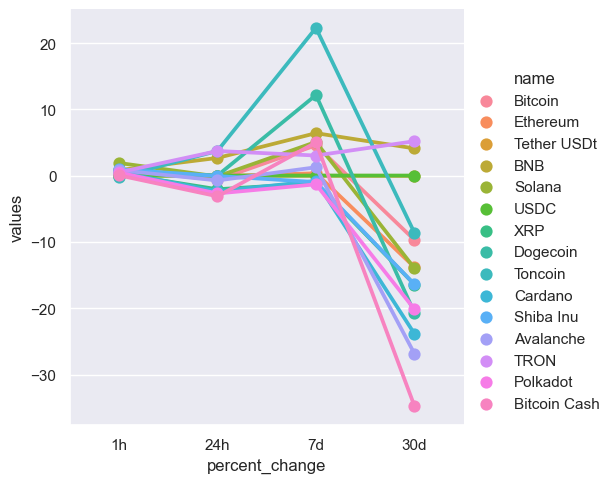

In [86]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

#width = 50
#height = 100
#sns.set(rc={'figure.figsize':(width, height)})

In [87]:
# querry method to print out a specific row based on determined parameters
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,61919.22181,2024-05-09 18:13:17.849646
